# Explore here

In [2]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.drop_duplicates().reset_index(drop=True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.to_csv('../data/raw/df_raw.csv', index=False)

In [5]:
#eliminar información irrelevante (acá no es necesario ya que no hay información no relevante)

#columnas_eliminar=['last_review','reviews_per_month','id','host_name','name']
#df.drop(columnas_eliminar,axis=1,inplace=True)
#df.info()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# Identificando variables categoricas, age y children son categoricas expresadas en numeros
from utils import columnas_categoricas
col_num_cat = ['age','children']
col_cat = columnas_categoricas(df,col_num_cat)

col_cat

['sex', 'smoker', 'region', 'age', 'children']

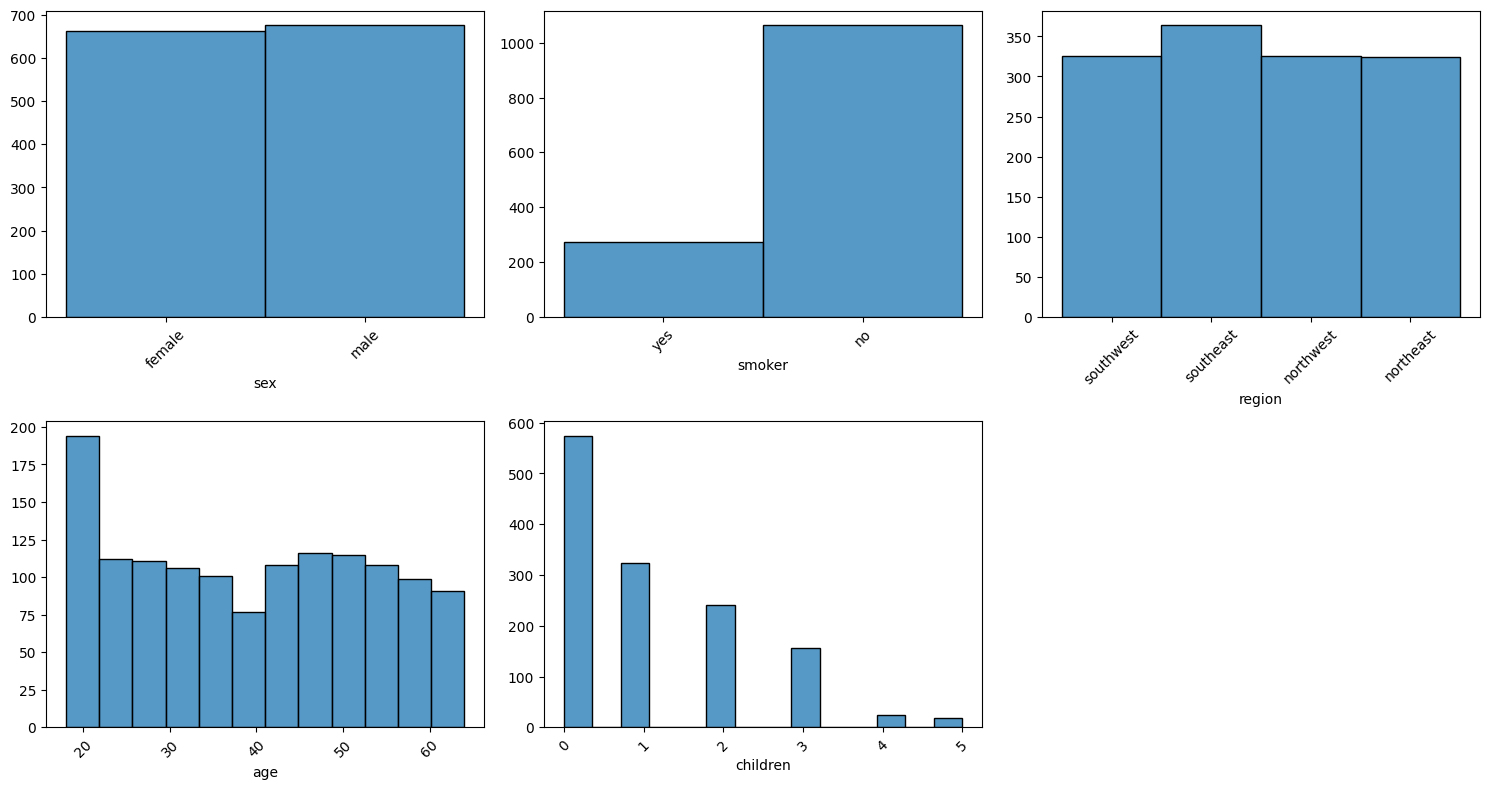

In [8]:
from utils import analisis_categorico_categorico

analisis_categorico_categorico(df,col_num_cat)

podemos ver en la base de datos que:
grafico uno: no hay disparidad de género, hay similar cantidades de h y m
dos: la mayor cantidad de personas no fuman
tres: las personas están distribuidas en todas las areas
cuatro: las personas en los años 20 tienen mayor probabilidad de contratar seguros
cinco: mientras mas pequeño es mas comun tener un seguro

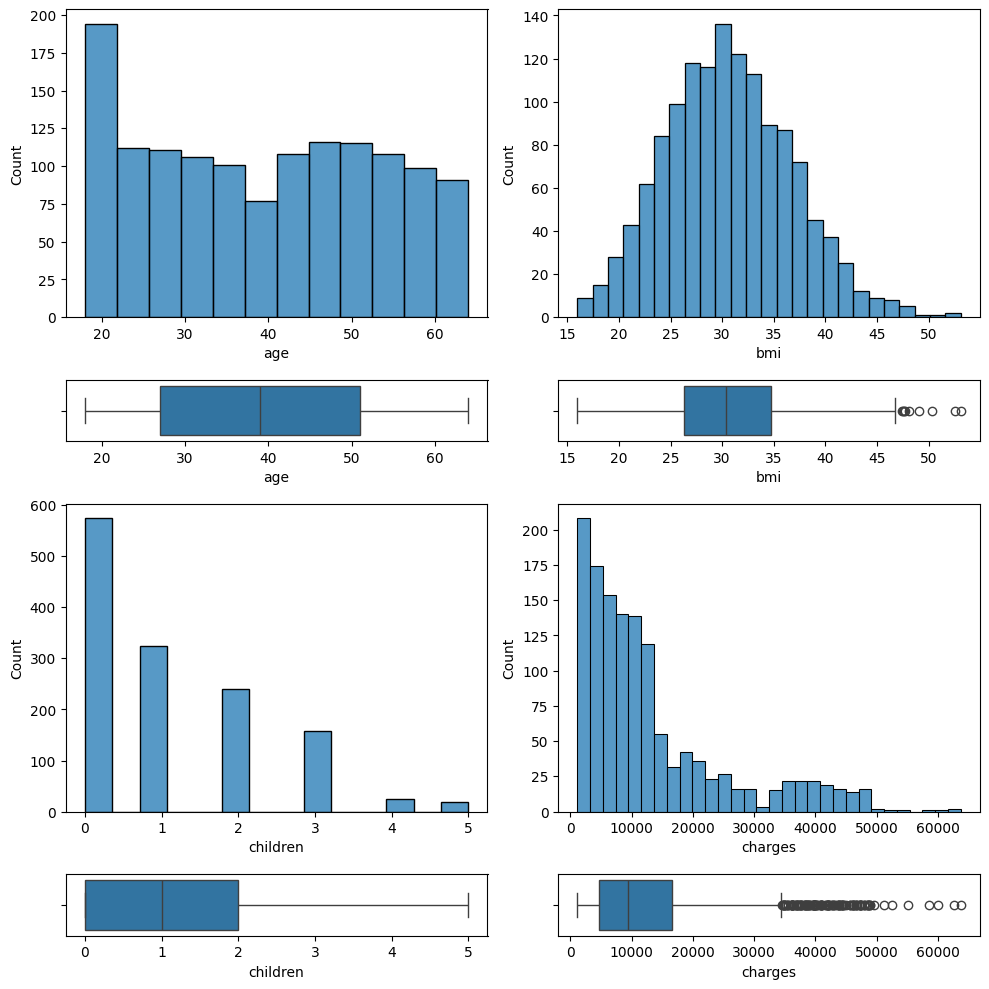

In [9]:
from utils import analisis_numerico_numerico

analisis_numerico_numerico(df,'charges',[0,2000,None,None,0,1500,0,200])
#analisis_numerico_numerico(df,'price',['latitude','longitude','host_id'],[0,2000,None,None,0,1500,0,200])
#esas latitud y otras son columnas excluidas, no servia para analisis numerico numerico.

La muestra tiene muchas personas jóvenes (18–20 años).

El BMI tiene forma de campana, pero con algunos valores extremos.

La mayoría de los valores de ambas variables se concentran en rangos esperables, aunque en bmi hay más valores fuera de rango (outliers).

La mayoría paga montos moderados, pero hay muchos valores extremos hacia arriba

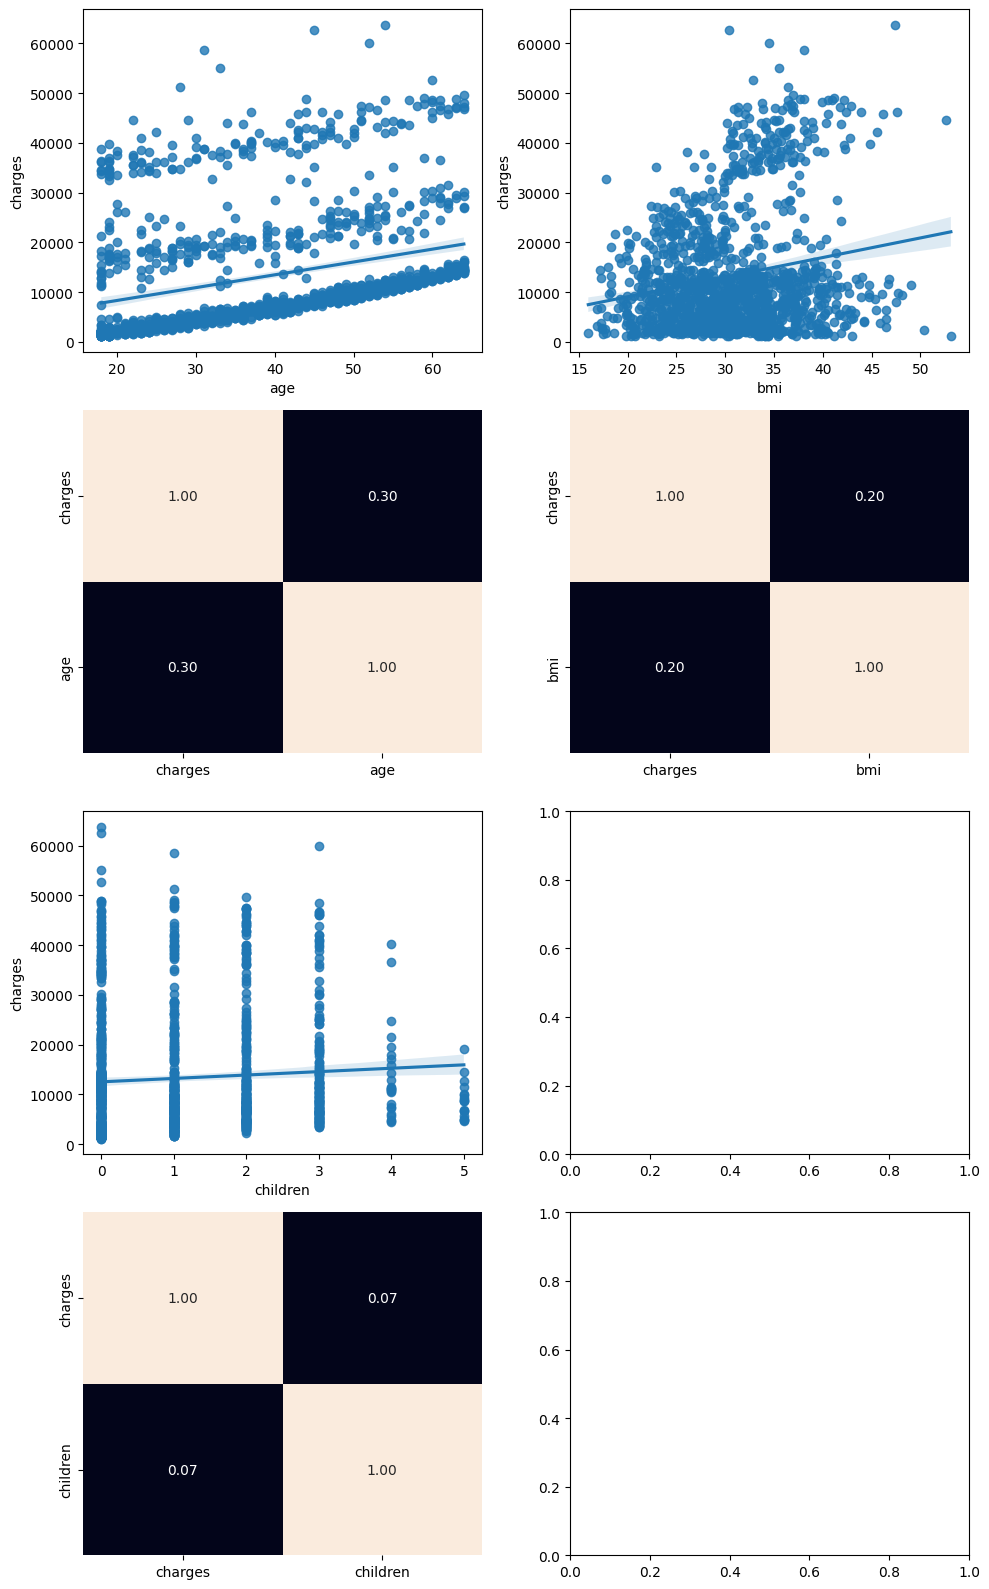

In [10]:
from utils import analisis_numerico_numerico_multivariante

analisis_numerico_numerico_multivariante(df,'charges')

podemos observar que hay una relacion entre la edad, el bmi con los cargos.

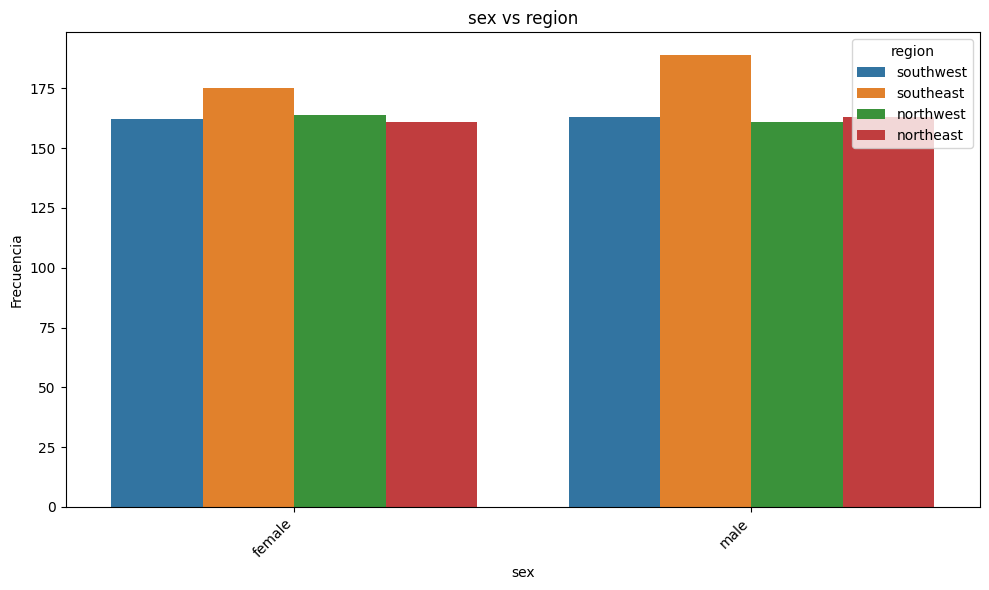

In [11]:
from utils import analisis_categorico_categorico_multivariante

analisis_categorico_categorico_multivariante(df,'sex','region')

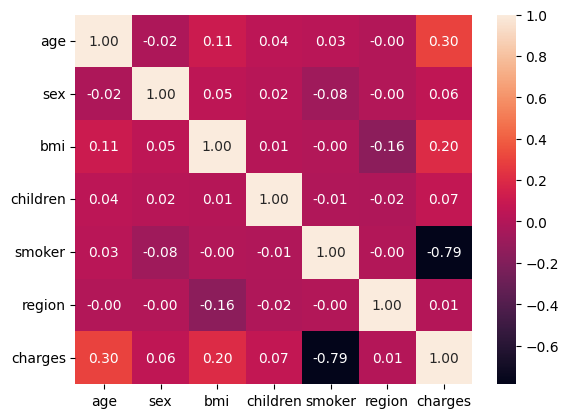

In [12]:
from utils import analisis_numerico_categorico

analisis_numerico_categorico(df)

Esto quiere decir que mientras mas carel seguro menos fuman?

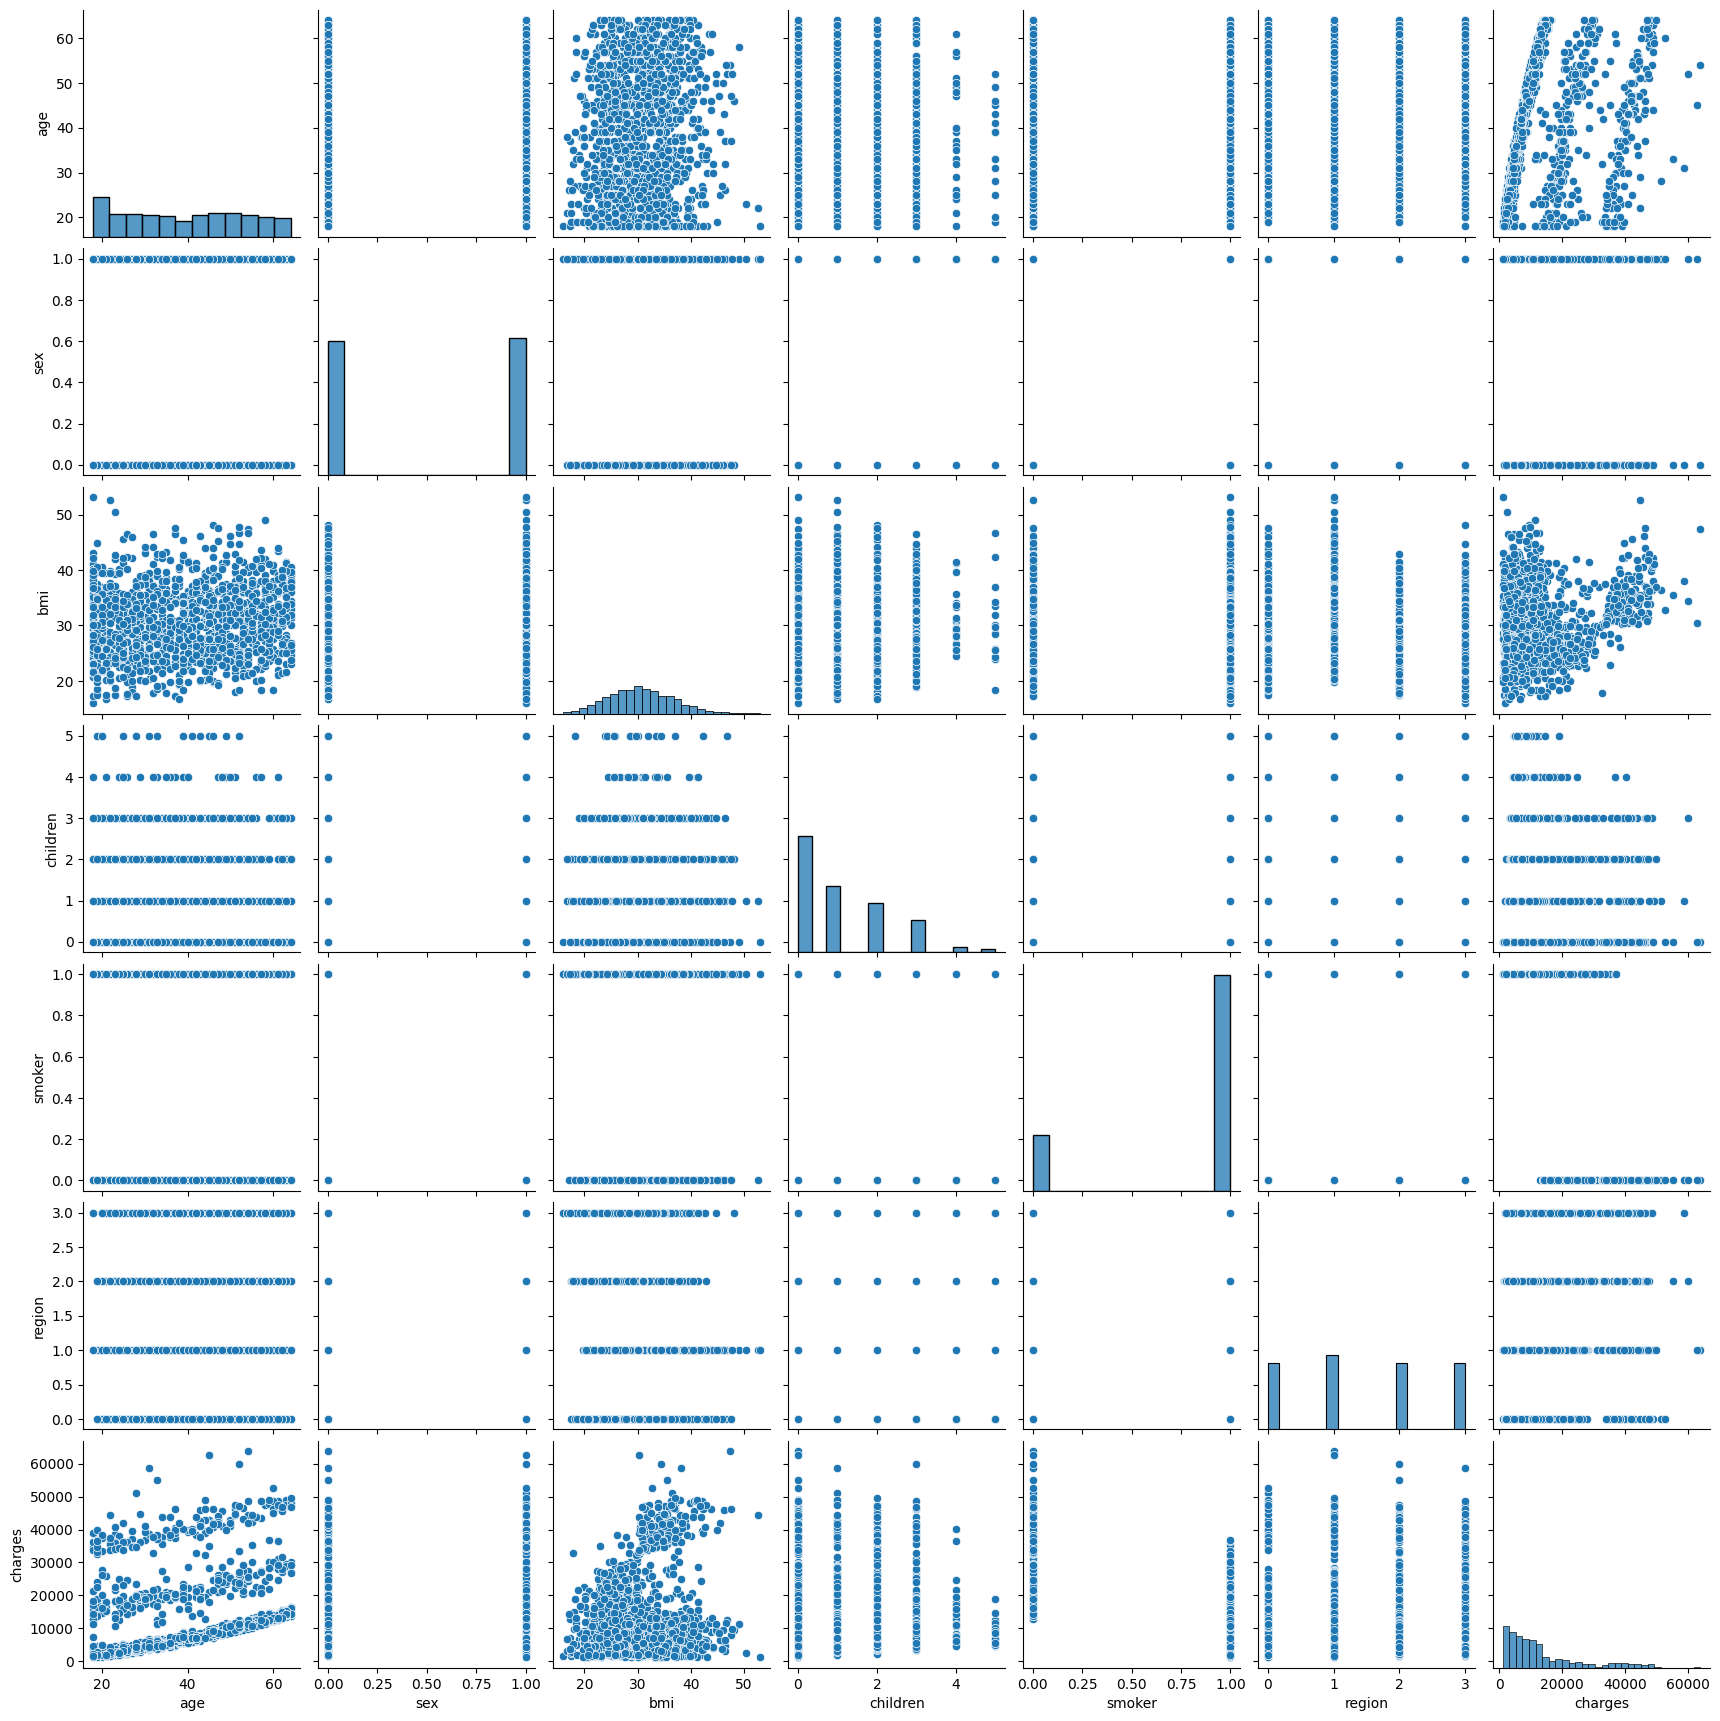

In [13]:
import seaborn as sns
sns.pairplot(data=df)

In [14]:
#ingeniería de caracteristicas

df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.795217,1.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,1.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,1.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,1.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


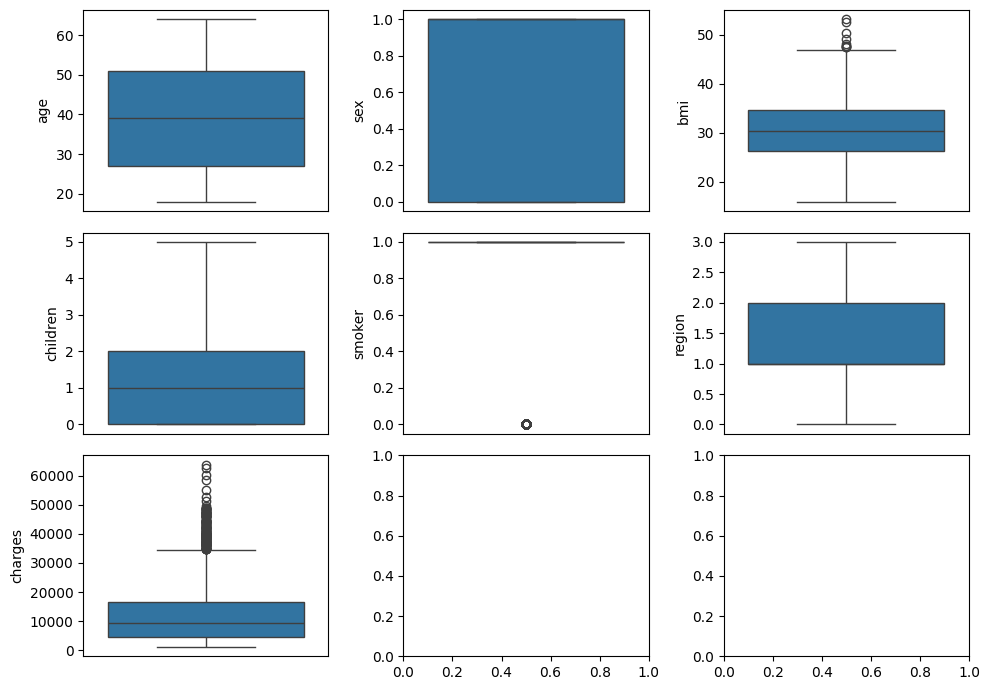

In [16]:
from utils import analisis_boxplot

analisis_boxplot(df,'charges')

In [17]:
from utils import analisis_ric

analisis_ric(df)

columna: age limites superior 87.0 e inferior -9.0
columna: sex limites superior 2.5 e inferior -1.5
columna: bmi limites superior 47.290000000000006 e inferior 13.7
columna: children limites superior 5.0 e inferior -3.0
columna: smoker limites superior 1.0 e inferior 1.0
columna: region limites superior 3.5 e inferior -0.5
columna: charges limites superior 34489.350562499996 e inferior -13109.1508975


In [ ]:
# Nuevas caracteristicas o eliminar redundantes
#df.drop(['neighbourhood'],axis=1,inplace=True)

In [18]:
from utils import escalar_caracteristicas
X,y = escalar_caracteristicas(df,'charges',tipo_escalado='Standar')

In [19]:
from utils import seleccionar_mejores_caracteristicas

X_train_sel, X_test_sel,y_train,y_test = seleccionar_mejores_caracteristicas(X,y)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


In [21]:
def guardar_csv_limpios(X_train_sel, X_test_sel, y_train, y_test,carpeta='../data/processed/'):
    X_train_sel['charges'] = list(y_train)
    X_test_sel['charges'] = list(y_test)
    X_train_sel.to_csv(carpeta+'train_limpio.csv',index=False)
    X_test_sel.to_csv(carpeta+'test_limpio.csv',index=False)